✅ MSE: 0.0013
✅ RMSE: 0.0355
✅ R² Score: 0.8800


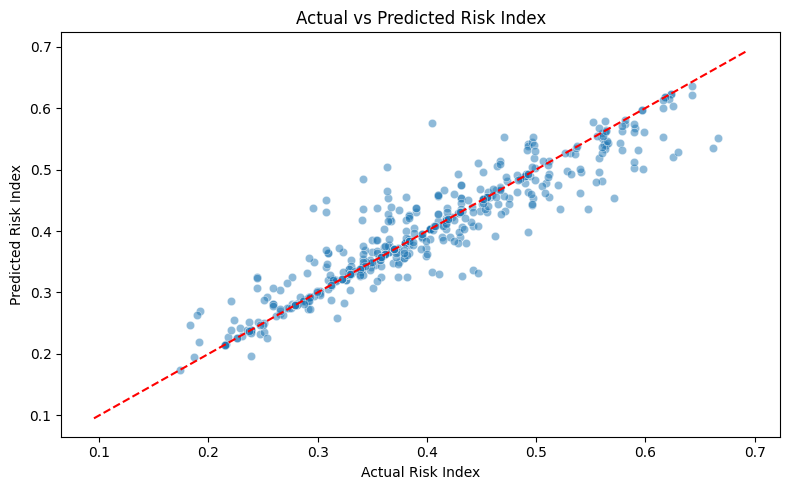

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt

# 데이터 불러오기
df = pd.read_csv(r"data/post_grouped_1km_0714.csv")

# 오버샘플링 유사 처리 (count 기준 최대 10회 반복)
df_no_roadkill = df[df["count"] == 0]
df_roadkill = df[df["count"] > 0].loc[df.index.repeat(df["count"].clip(upper=10))]
df_balanced = pd.concat([df_no_roadkill, df_roadkill]).reset_index(drop=True)


# 스케일링 대상 컬럼 지정
features_to_scale = [
    "traffic",
    "fence",
    "eco",
    "agri",
    "water",
    "1km_inner",
    "avg_low_temp_springautumn",
    "avg_low_temp_summer",
    "avg_low_temp_winter",
    "avg_temp_springautumn",
    "avg_temp_summer",
    "avg_temp_winter",
    "avg_wind_springautumn",
    "avg_wind_summer",
    "avg_wind_winter",
    "max_snow_springautumn",
    "max_snow_summer",
    "max_snow_winter",
    "month_total_rain_springautumn",
    "month_total_rain_summer",
    "month_total_rain_winter",
]

# MinMax Scaling
scaler = MinMaxScaler()
scaled_df = pd.DataFrame(
    scaler.fit_transform(df_balanced[features_to_scale]), columns=features_to_scale
)

# 위험지수 요소
A = scaled_df[["traffic", "1km_inner"]].mean(axis=1)
B = 1 - scaled_df[["fence", "eco"]].mean(axis=1)
C = scaled_df[
    [
        "water",
        "agri",
        "avg_temp_springautumn",
        "avg_temp_winter",
        "month_total_rain_winter",
    ]
].mean(axis=1)
D = scaled_df[["max_snow_winter", "avg_low_temp_winter"]].mean(axis=1)

# 가중 평균 방식으로 위험지수 계산 (ex-ARI 방식)
df_balanced["risk_index"] = (A * 1 + B * 1.46 + C * 1.78 + D * 1.28) / (
    1 + 1.46 + 1.78 + 1.28
)

# X, y 정의
used_in_risk_index = [
    "traffic",
    "1km_inner",
    "fence",
    "eco",
    "water",
    "agri",
    "avg_temp_springautumn",
    "avg_temp_winter",
    "month_total_rain_winter",
    "max_snow_winter",
    "avg_low_temp_winter",
]
X = df_balanced.drop(columns=["risk_index", "count"] + used_in_risk_index)
y = df_balanced["risk_index"]

# 학습/테스트 분할
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 랜덤포레스트 회귀 모델 학습
regressor = RandomForestRegressor(n_estimators=100, random_state=42)
regressor.fit(X_train, y_train)

# 예측 및 평가
y_pred = regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = mse**0.5
r2 = r2_score(y_test, y_pred)

print(f"✅ MSE: {mse:.4f}")
print(f"✅ RMSE: {rmse:.4f}")
print(f"✅ R² Score: {r2:.4f}")


# 실제 vs 예측값 시각화
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], "r--")
plt.xlabel("Actual Risk Index")
plt.ylabel("Predicted Risk Index")
plt.title("Actual vs Predicted Risk Index")
plt.tight_layout()
plt.show()

In [4]:
import pandas as pd

df = pd.read_csv(r"승아지수_0715.csv")
print(df.columns.tolist())
print(df.head())

['post_group', 'year', 'traffic', 'fence', 'eco', 'agri', 'water', '1km_inner', 'count', 'avg_low_temp_springautumn', 'avg_low_temp_summer', 'avg_low_temp_winter', 'avg_temp_springautumn', 'avg_temp_summer', 'avg_temp_winter', 'avg_wind_springautumn', 'avg_wind_summer', 'avg_wind_winter', 'max_snow_springautumn', 'max_snow_summer', 'max_snow_winter', 'month_total_rain_springautumn', 'month_total_rain_summer', 'month_total_rain_winter', 'count_binary', 'risk_index']
   post_group  year     traffic  fence  eco  agri  water  1km_inner  count  \
0           0  2019  226.918601      1    0     0      0          1      0   
1           0  2020  222.766523      1    0     0      0          1      0   
2           0  2021  211.874653      1    0     0      0          1      0   
3           0  2022  260.202452      1    0     0      0          1      0   
4           0  2023  239.057815      1    0     0      0          1      0   

   avg_low_temp_springautumn  ...  avg_wind_summer  avg_wind_

✅ MSE: 0.0001
✅ RMSE: 0.0074
✅ R² Score: 0.9948


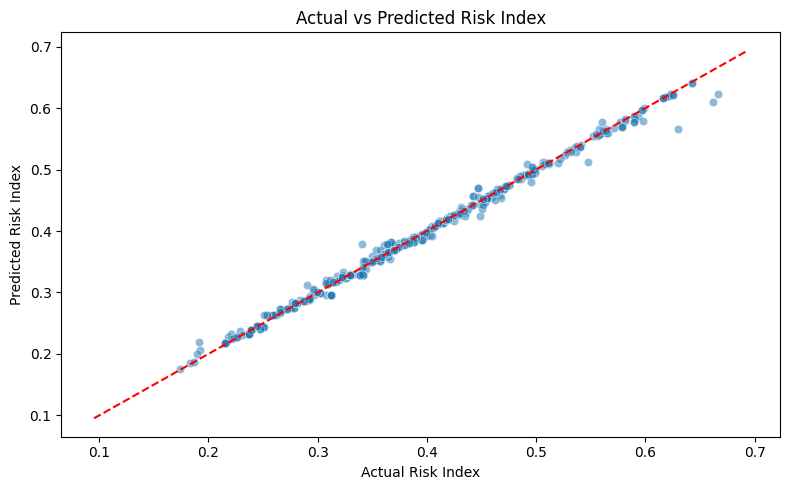

In [3]:
# 1.used_in_risk_index feature들도 X에 넣은 코드

import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt

# 데이터 불러오기
df = pd.read_csv(r"data\post_grouped_1km_0714.csv")

# 오버샘플링 유사 처리 (count 기준 최대 10회 반복)
df_no_roadkill = df[df["count"] == 0]
df_roadkill = df[df["count"] > 0].loc[df.index.repeat(df["count"].clip(upper=10))]
df_balanced = pd.concat([df_no_roadkill, df_roadkill]).reset_index(drop=True)

# 스케일링 대상 컬럼 지정
features_to_scale = [
    "traffic",
    "fence",
    "eco",
    "agri",
    "water",
    "1km_inner",
    "avg_low_temp_springautumn",
    "avg_low_temp_summer",
    "avg_low_temp_winter",
    "avg_temp_springautumn",
    "avg_temp_summer",
    "avg_temp_winter",
    "avg_wind_springautumn",
    "avg_wind_summer",
    "avg_wind_winter",
    "max_snow_springautumn",
    "max_snow_summer",
    "max_snow_winter",
    "month_total_rain_springautumn",
    "month_total_rain_summer",
    "month_total_rain_winter",
]

# MinMax Scaling
scaler = MinMaxScaler()
scaled_df = pd.DataFrame(
    scaler.fit_transform(df_balanced[features_to_scale]), columns=features_to_scale
)

# 위험지수 요소
A = scaled_df[["traffic", "1km_inner"]].mean(axis=1)
B = 1 - scaled_df[["fence", "eco"]].mean(axis=1)
C = scaled_df[
    [
        "water",
        "agri",
        "avg_temp_springautumn",
        "avg_temp_winter",
        "month_total_rain_winter",
    ]
].mean(axis=1)
D = scaled_df[["max_snow_winter", "avg_low_temp_winter"]].mean(axis=1)

# 가중 평균 방식으로 위험지수 계산 (ex-ARI 방식)
df_balanced["risk_index"] = (A * 1 + B * 1.46 + C * 1.78 + D * 1.28) / (
    1 + 1.46 + 1.78 + 1.28
)

# used_in_risk_index 포함해서 X 구성
X = df_balanced.drop(columns=["risk_index", "count"])
y = df_balanced["risk_index"]

# 학습/테스트 분할
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# RandomForest 회귀
regressor = RandomForestRegressor(n_estimators=300, max_depth=10, random_state=42)
regressor.fit(X_train, y_train)

# 예측
y_pred = regressor.predict(X_test)

# 평가
mse = mean_squared_error(y_test, y_pred)
rmse = mse**0.5
r2 = r2_score(y_test, y_pred)

print(f"✅ MSE: {mse:.4f}")
print(f"✅ RMSE: {rmse:.4f}")
print(f"✅ R² Score: {r2:.4f}")

# 실제 vs 예측 scatterplot
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], "r--")
plt.xlabel("Actual Risk Index")
plt.ylabel("Predicted Risk Index")
plt.title("Actual vs Predicted Risk Index")
plt.tight_layout()
plt.show()

In [33]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import spearmanr, pearsonr

# ----------------------------
# 1. 데이터 불러오기
# ----------------------------

df_over = pd.read_csv("data/oversampling_labeled.csv")

# ----------------------------
# 2. 필요한 변수만 스케일링
# ----------------------------

features = ["traffic", "max_snow_winter", "avg_low_temp_winter"]

scaler = MinMaxScaler()
scaled = scaler.fit_transform(df_over[features])
scaled_df = pd.DataFrame(scaled, columns=features)

# ----------------------------
# 3. risk_index 계산
# ----------------------------

# avg_low_temp_winter 낮을수록 위험 ↑ → (1 - 값)로 변환
risk_index_new = (
    scaled_df["traffic"] * 8
    + scaled_df["max_snow_winter"] * 4
    + (1 - scaled_df["avg_low_temp_winter"]) * 3
) / (8 + 4 + 3)

df_over["risk_index"] = risk_index_new

# ----------------------------
# 4. Binary target 생성
# ----------------------------

# risk_grade_3 → binary target (mid, high = 1, low = 0)
df_over["count_binary"] = df_over["risk_grade_3"].apply(
    lambda x: 1 if x in [1, 2] else 0
)

# ----------------------------
# 5. 출력
# ----------------------------

# 원하는 컬럼만 출력
print(df_over[["risk_index", "count", "count_binary"]].head())

# 상관계수 계산
spearman_corr, p_s = spearmanr(df_over["risk_index"], df_over["count_binary"])
pearson_corr, p_p = pearsonr(df_over["risk_index"], df_over["count_binary"])

print(f"risk_index_final_v5과 count_binary 사이의 상관계수: {spearman_corr:.3f}")

   risk_index  count  count_binary
0    0.072454      0             0
1    0.072454      0             0
2    0.072454      0             0
3    0.072454      0             0
4    0.081537      0             0
risk_index_final_v5과 count_binary 사이의 상관계수: 0.331


In [14]:
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# 데이터 불러오기
df = pd.read_csv(r"승아지수_0715.csv")

# 타겟
target = "risk_index"

X = df.drop(columns=[target])
y = df[target]

kf = KFold(n_splits=5, shuffle=True, random_state=42)

r2_train_scores = []
r2_val_scores = []

for fold, (train_idx, val_idx) in enumerate(kf.split(X), 1):
    X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
    y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

    model = LinearRegression()
    model.fit(X_train, y_train)

    # predict
    y_pred_train = model.predict(X_train)
    y_pred_val = model.predict(X_val)

    # scores
    r2_train = r2_score(y_train, y_pred_train)
    r2_val = r2_score(y_val, y_pred_val)

    r2_train_scores.append(r2_train)
    r2_val_scores.append(r2_val)

    print(f"Fold {fold} - R² Train: {r2_train:.4f}, R² Val: {r2_val:.4f}")

print(f"✅ 평균 Train R²: {np.mean(r2_train_scores):.4f}")
print(f"✅ 평균 Val R²: {np.mean(r2_val_scores):.4f}")

Fold 1 - R² Train: 0.9801, R² Val: 0.9806
Fold 2 - R² Train: 0.9799, R² Val: 0.9813
Fold 3 - R² Train: 0.9804, R² Val: 0.9791
Fold 4 - R² Train: 0.9812, R² Val: 0.9757
Fold 5 - R² Train: 0.9797, R² Val: 0.9817
✅ 평균 Train R²: 0.9803
✅ 평균 Val R²: 0.9797


In [ ]:
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# 데이터 불러오기
df = pd.read_csv(r"승아지수_0715.csv")

# risk_index 계산에 사용한 변수 제외
used_in_risk_index = [
    "traffic",
    "1km_inner",
    "fence",
    "eco",
    "water",
    "agri",
    "avg_temp_springautumn",
    "avg_temp_winter",
    "month_total_rain_winter",
    "max_snow_winter",
    "avg_low_temp_winter",
]

X = df.drop(columns=used_in_risk_index + ["risk_index"])
y = df["risk_index"]

kf = KFold(n_splits=5, shuffle=True, random_state=42)

r2_train_scores = []
r2_val_scores = []

for fold, (train_idx, val_idx) in enumerate(kf.split(X), 1):
    X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
    y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

    # --------------------------------------------------------
    # ★★ 여기만 바꾸면 다른 모델로 바꿀 수 있음 ★★
    # --------------------------------------------------------

    from sklearn.svm import SVR

    model = SVR(kernel='rbf', C=1.0, epsilon=0.1)


    # 예: Ridge 쓰고 싶으면 이렇게
    # from sklearn.linear_model import Ridge
    # model = Ridge(alpha=1.0)

    # --------------------------------------------------------

    model.fit(X_train, y_train)

    y_pred_train = model.predict(X_train)
    y_pred_val = model.predict(X_val)

    r2_train = r2_score(y_train, y_pred_train)
    r2_val = r2_score(y_val, y_pred_val)

    r2_train_scores.append(r2_train)
    r2_val_scores.append(r2_val)

    print(f"Fold {fold} - R² Train: {r2_train:.4f}, R² Val: {r2_val:.4f}")

print(f"✅ 평균 Train R²: {np.mean(r2_train_scores):.4f}") 
print(f"✅ 평균 Val R²: {np.mean(r2_val_scores):.4f}")

Fold 1 - R² Train: 0.4793, R² Val: 0.4451
Fold 2 - R² Train: 0.4640, R² Val: 0.5125
Fold 3 - R² Train: 0.4836, R² Val: 0.4317
Fold 4 - R² Train: 0.4676, R² Val: 0.4977
Fold 5 - R² Train: 0.4709, R² Val: 0.4644
✅ 평균 Train R²: 0.4731
✅ 평균 Val R²: 0.4703


In [30]:
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# ------------------------------------------
# 데이터 불러오기
# ------------------------------------------
df = pd.read_csv(r"승아지수_0715.csv")

# risk_index 계산에 사용한 변수 제외
used_in_risk_index = [
    "traffic",
    "1km_inner",
    "fence",
    "eco",
    "water",
    "agri",
    "avg_temp_springautumn",
    "avg_temp_winter",
    "month_total_rain_winter",
    "max_snow_winter",
    "avg_low_temp_winter",
]

X = df.drop(columns=used_in_risk_index + ["risk_index"])
y = df["risk_index"]

# ------------------------------------------
# KFold 설정
# ------------------------------------------
kf = KFold(n_splits=5, shuffle=True, random_state=42)

r2_train_scores = []
r2_val_scores = []

for fold, (train_idx, val_idx) in enumerate(kf.split(X), 1):
    X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
    y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

    # ------------------------------------------
    # 스케일링
    # ------------------------------------------
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled = scaler.transform(X_val)

    # ------------------------------------------
    # SVR 모델 (튜닝된 파라미터)
    # ------------------------------------------
    model = SVR(kernel="rbf", C=10, epsilon=0.01)
    model.fit(X_train_scaled, y_train)

    # ------------------------------------------
    # 예측
    # ------------------------------------------
    y_pred_train = model.predict(X_train_scaled)
    y_pred_val = model.predict(X_val_scaled)

    # ------------------------------------------
    # 점수 계산
    # ------------------------------------------
    r2_train = r2_score(y_train, y_pred_train)
    r2_val = r2_score(y_val, y_pred_val)

    r2_train_scores.append(r2_train)
    r2_val_scores.append(r2_val)

    print(f"Fold {fold} - R² Train: {r2_train:.4f}, R² Val: {r2_val:.4f}")

# 최종 평균 점수
print(f"✅ 평균 Train R²: {np.mean(r2_train_scores):.4f}")
print(f"✅ 평균 Val R²: {np.mean(r2_val_scores):.4f}")

Fold 1 - R² Train: 0.6684, R² Val: 0.6536
Fold 2 - R² Train: 0.6586, R² Val: 0.6648
Fold 3 - R² Train: 0.6765, R² Val: 0.5719
Fold 4 - R² Train: 0.6749, R² Val: 0.6340
Fold 5 - R² Train: 0.6788, R² Val: 0.5953
✅ 평균 Train R²: 0.6714
✅ 평균 Val R²: 0.6239
